# Analyse du jeu de données

Dans ce rapport nous allons analyser la base *wine-quality-red*, disponible au lien suivant :

https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(url, delimiter=';')
df = data.copy()
df.sample(8)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
811,12.9,0.500,0.55,2.8,0.072,7.0,24.0,1.00012,3.09,0.68,10.9,6
903,6.8,0.590,0.06,6.0,0.060,11.0,18.0,0.99620,3.41,0.59,10.8,7
772,9.5,0.570,0.27,2.3,0.082,23.0,144.0,0.99782,3.27,0.55,9.4,5
966,9.0,0.380,0.41,2.4,0.103,6.0,10.0,0.99604,3.13,0.58,11.9,7
959,8.0,0.590,0.05,2.0,0.089,12.0,32.0,0.99735,3.36,0.61,10.0,5
832,10.4,0.440,0.42,1.5,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
1131,5.9,0.190,0.21,1.7,0.045,57.0,135.0,0.99341,3.32,0.44,9.5,5
12,5.6,0.615,0.00,1.6,0.089,16.0,59.0,0.99430,3.58,0.52,9.9,5


## Description des variables

 - `fixed acidity` (g(tartaric acid)/dm3): la plupart des acides présents dans le vin sont fixes ou non volatiles (ne s'évaporent pas facilement).
 - `volatile acidity` (g(acetic acid)/dm3): la quantité d'acide acétique dans le vin, qui, à des niveaux trop élevés, peut donner un goût désagréable de vinaigre.
 - `citric acid` (g/dm3): présent en petites quantités, l'acide citrique peut ajouter de la fraîcheur et de la saveur aux vins.
 - `residual sugar` (g/dm3): la quantité de sucre restant après l'arrêt de la fermentation, il est rare de trouver des vins avec moins de 1 gramme/litre et les vins avec plus de 45 grammes/litre sont considérés comme doux.
 - `chlorides` (g(sodium chloride)/dm3): la quantité de sel dans le vin.
 - `free sulfur dioxide` (mg/dm3): la forme libre du SO2 existe en équilibre entre le SO2 moléculaire (sous forme de gaz dissous) et l'ion bisulfite ; elle empêche la croissance microbienne et l'oxydation du vin.
 - `total sulfur dioxide` (mg/dm3): quantité de formes libres et liées de S02 ; à faible concentration, le SO2 est généralement indétectable dans le vin, mais à des concentrations de SO2 libre supérieures à 50 ppm, le SO2 devient évident au nez et au goût du vin.
 - `density` (g/cm3): la densité du vin est proche de celle de l'eau, selon le pourcentage d'alcool et la teneur en sucre.
 - `pH`: décrit l'acidité ou la basicité d'un vin sur une échelle allant de 0 (très acide) à 14 (très basique) ; la plupart des vins se situent entre 3 et 4 sur l'échelle du pH.
 - `sulphates` (g(potassium sulphate)/dm3): un additif du vin qui peut contribuer aux niveaux de gaz sulfureux (S02), qui agit comme un antimicrobien et un antioxydant.
 - `alcohol` (% vol.): le pourcentage d'alcool contenu dans le vin.
 - `quality`: variable de sortie (basée sur des données sensorielles, note entre 0 et 10).

## Généralités

Une première analyse de cette base de donnée peut être effectué avec le module `ProfileReport` du package `pandas_profiling`. Le code correspond ainsi que le détail des résultats pevent être retrouvé en annexe 1. Les points importants sont les suivants:
- On dispose de 1599 observations et de 11 variables quantitative continues et d'une variable qualitative ordinale, `quality`, que l'on va tenter de prédire.
- Il n'y a pas de valeurs manquantes.
- Il y a 15% de lignes dupliquées.
- Il y a 8,3% de zeros pour la variable `citric acid`.
- La répartition des valeurs pour la variable `quality` inégale.

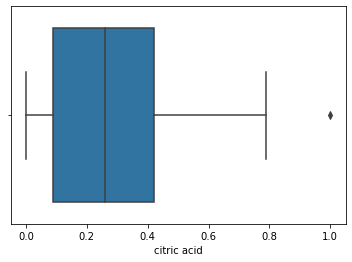

In [7]:
sns.boxplot(x='citric acid', data=df);

Les zeros de la variable `citric acid` ne semblent pas abérrants au vu de la distribution de la variable.

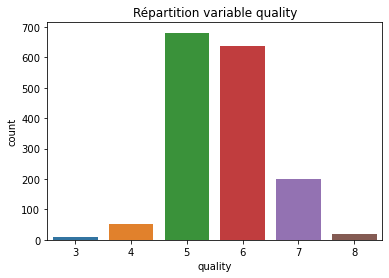

In [18]:
# plt.figure(figsize=(13,4))
# plt.subplot(1,2,1)
sns.countplot(x='quality', data=df)
plt.title('Répartition variable quality');
# plt.subplot(1,2,2)
# bons_vins = df.quality > 6.5
# labels = labels=['quality < 6.5', 'quality > 6.5']
# plt.pie(x=df.quality.value_counts(), autopct="%.1f%%", explode=[0.1]*6)#, labels=labels)
# plt.title('Qualité des vins');

Les classes sont assez déséquilibrées, il y a beaucoup plus de vins avec une note moyenne que de vins avec une mauvaise ou une bonne note.

## Statistiques univariés

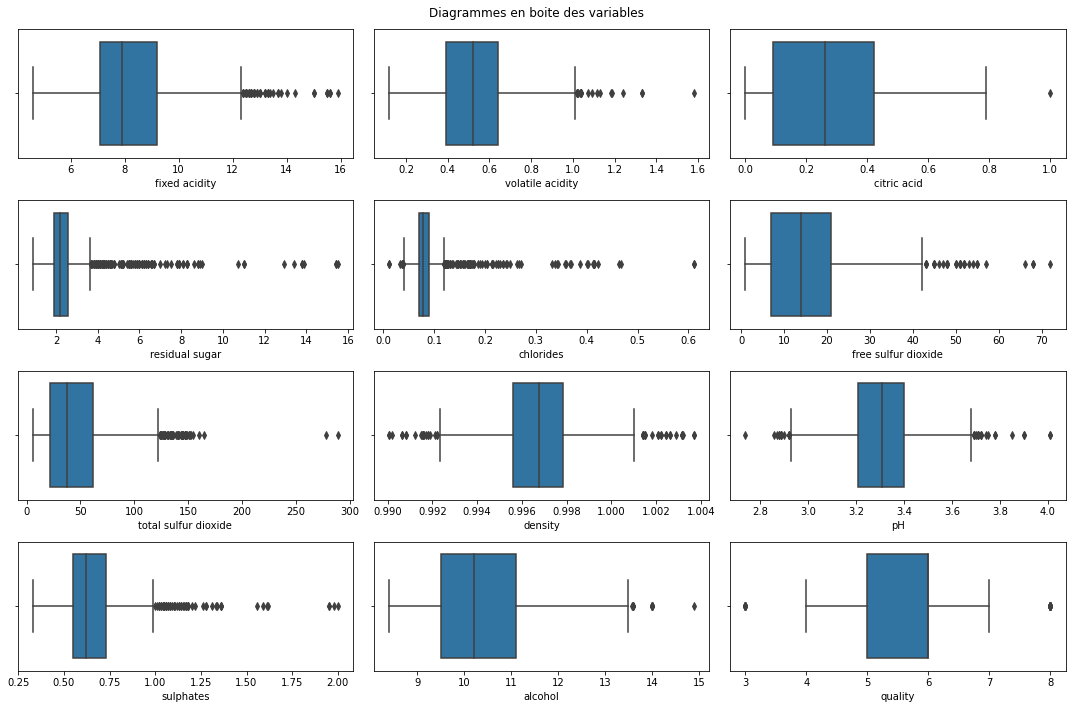

In [19]:
fig = plt.figure(figsize=(15,10))
for i, column in enumerate(df.columns):
    plt.subplot(4,3,i+1)
    fig.tight_layout(pad=2)
    sns.boxplot(x = column, data=df)
fig.suptitle('Diagrammes en boite des variables')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

On remarque qu'il y a beaucoup d'outliers pour la majorité des variables.

## Statistiques bivariées

Intéressons nous maintenant au corrélations entre la variable objectif `quality` est les autres variables.

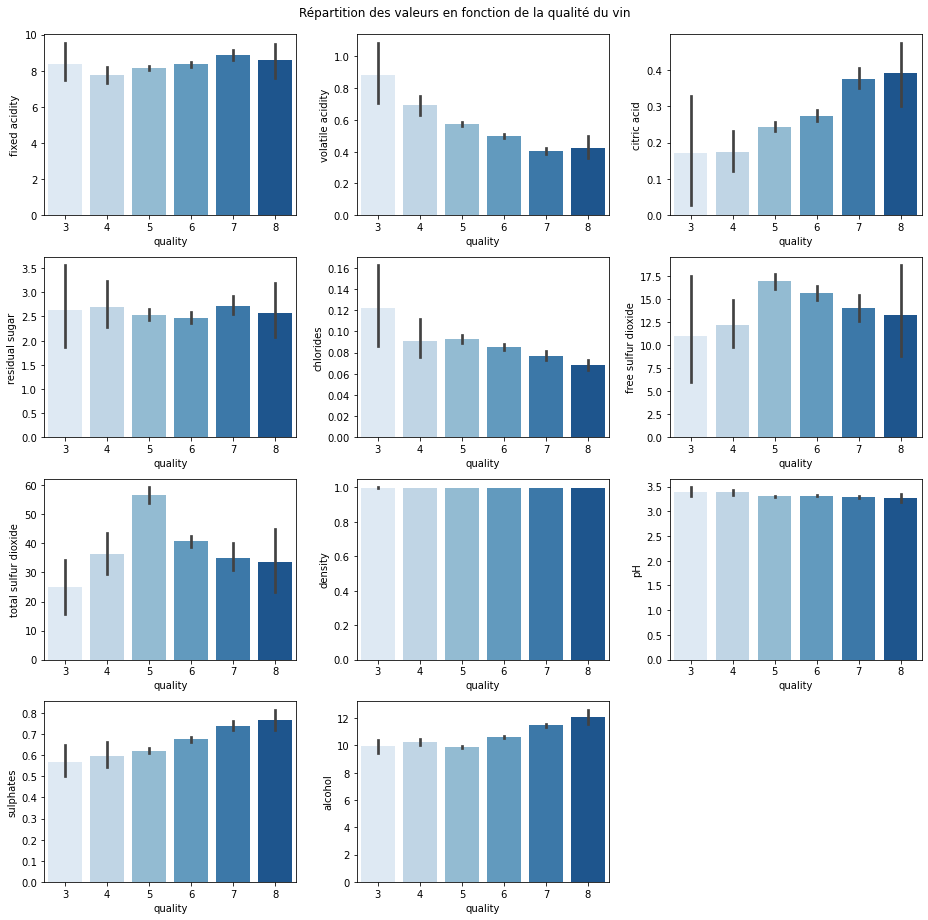

In [6]:
fig = plt.figure(figsize = (13, 13))
for i, column in enumerate(df.drop('quality', axis=1).columns):
    plt.subplot(4, 3, i+1)
    sns.barplot(x = 'quality', y = f'{column}', data = df, palette='Blues')
fig.suptitle('Répartition des valeurs en fonction de la qualité du vin')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

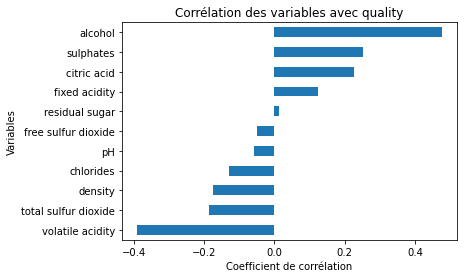

In [7]:
df.corr().quality.sort_values(ascending=False).iloc[1:12][::-1].plot(kind='barh')
plt.title("Corrélation des variables avec quality", size=12)
plt.xlabel("Coefficient de corrélation")
plt.ylabel("Variables");

Nous pouvons voir que sur notre échantillon la variable `quality` est principalement corrélée:
- positivement avec la variable `alcohol`
- négativement avec la variable `volatile acidity`.

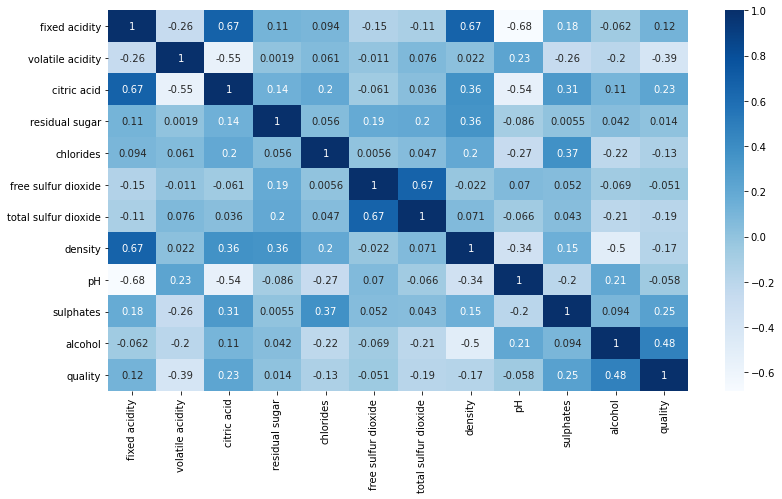

In [8]:
plt.figure(figsize=(13, 7))
sns.heatmap(df.corr(), cmap='Blues', annot=True);

Concernant les autre variables, on remarque des corrélation positive entre les variable `fixed acidity`, `citric acid` et `density`. Les variables `pH` et `fixed acidity` sont quand à elle corrélées négativement. C'est conclusion sont logique si on considère les propriétés des physiques de ces éléments.

## Tests d'hypothèses

Testons les hypothèses nulles suivantes avec un test de Student:
1. les vins bien notés ont un volume d'alcool moyen égaux aux autres vins
2. les vins moins bien notés présentes une acidité volatile moyenne égale aux autre vins.

Le tests de Student se font sur des classes équilibrées nous allons donc tirer au hasard dans **medium_rate_df** et **good_rate_df** des échantillons de taille 63.

In [181]:
def prepare_test(df):
    good_mark_df = df[df.quality > 6.5]
    #print('good_mark_df.shape:', good_mark_df.shape)
    medium_mark_df = df[df.quality < 6.5]
    #print('medium_mark_df.shape:', medium_mark_df.shape)
    balenced_medium_mark_df = medium_mark_df.sample(good_mark_df.shape[0])
    #print('balenced_med_mark_df.shape:', balenced_medium_mark_df.shape)
    return balenced_medium_mark_df, good_mark_df

In [182]:
from scipy.stats import ttest_ind, kstest

In [212]:
def test(col, test):
    medium_rate_df, good_rate_df = prepare_test(df)
    alpha = 0.01
    stat, p = test(medium_rate_df[col], good_rate_df[col])
    if p < alpha:
        return 'H0 Rejetée'
    else :
        return 0

In [218]:
print('H0 : Les vins bien notés ont les mêmes moyennes que les vins avec des notes moyennes.\n')
print(f'{str( ) :<25} {"ttest":<15} {"kstest"}')
for col in df.columns:
    print(f'{col :<25} {test(col, ttest_ind) :<15} {test(col, kstest) :<5}')

H0 : Les vins bien notés ont les mêmes moyennes que les vins avec des notes moyennes.

                          ttest           kstest
fixed acidity             H0 Rejetée      H0 Rejetée
volatile acidity          H0 Rejetée      H0 Rejetée
citric acid               H0 Rejetée      H0 Rejetée
residual sugar            0               0    
chlorides                 H0 Rejetée      H0 Rejetée
free sulfur dioxide       0               H0 Rejetée
total sulfur dioxide      H0 Rejetée      H0 Rejetée
density                   H0 Rejetée      H0 Rejetée
pH                        0               0    
sulphates                 H0 Rejetée      H0 Rejetée
alcohol                   H0 Rejetée      H0 Rejetée
quality                   H0 Rejetée      H0 Rejetée


On peut conclure d'après le résultats des tests que les variables `residual sugar` et `pH` ne semblent pas avoir d'impact significatif sur la variable `quality`.

## Bilan de l'analyse

Le jeu de donnée ne nécéssite pas de difficulté particulière pour le nettoyage et la prépation si ce n'est le fait que la proportion de vins jugés comme bons est assez faible. En effet, il serrait intéréssant de rémédier au problème d'inégalité de répartition des valeurs prises par la variable `quality` pour obtenir de meilleures prédictions. En effet, il est plus dur pour un modèle de machine learning d'apprendre les caratèristiques d'une classe minoritaire. De plus, un modèle naïf peut atteindre une précision raisonnable en prédisant simplement la classe majoritaire dans tous les cas.
De plus, certaines variables dispose de nombreux outliers.
Pour finir, il serrait intéréssant de procéder à du feature engineering.
<!-- 
Trois possibilité s'offre à nous:
1. Ré-échantillonner le data set.
2. Utiliser des métriques adaptées.
4. Utiliser des algorithme avec pénalisation
3. Utiliser un détecteur d'outliers.

Dans un premier temps, nous allons donc utiliser la première méthode et appliquer des modèles de regression. Puis dans un deuxième temps nous utiliserons des méthodes de classification et évaluer nos résultats avec des métriques adaptées. Enfin, nous essaierons de détecter les bons vins avec la méthode *LocalOutlierFactor* de *scikit-learn*. -->

# Régression

## Préparation du jeu de données

In [9]:
# from collections import Counter
# from sklearn.datasets import make_classification
# from imblearn.over_sampling import SMOTE 
# X, y = make_classification(n_classes=2, class_sep=2,
# weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
# n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
# print('Original dataset shape {}'.format(Counter(y)))
# #Original dataset shape Counter({1: 900, 0: 100})
# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_sample(X, y)
# print('Resampled dataset shape {}'.format(Counter(y_res)))
# #Resampled dataset shape Counter({0: 900, 1: 900})

In [10]:
# from collections import Counter
# from sklearn.datasets import make_classification
# from imblearn.over_sampling import SMOTE
# X, y = make_classification(n_classes=2, class_sep=2,weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
# print('Original dataset shape {}'.format(Counter(y)))
# #Original dataset shape Counter({1: 900, 0: 100})
# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_sample(X, y)
# print('Resampled dataset shape {}'.format(Counter(y_res)))
# #Resampled dataset shape Counter({0: 900, 1: 900}

In [11]:
# from collections import Counter
# from imblearn.combine import SMOTETomek
# smt = SMOTETomek()
# X = df.drop('quality', axis=1)
# y = df.quality
# print('Original dataset shape {}'.format(Counter(y)))
# smt = SMOTETomek(random_state=42)
# X_res, y_res = smt.fit_sample(X, y)
# print('Resampled dataset shape {}'.format(Counter(y_res)))

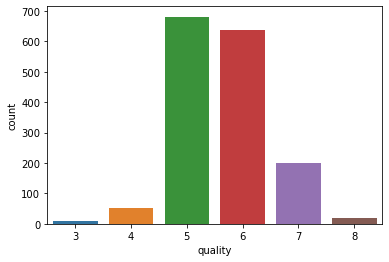

In [12]:
sns.countplot(x='quality', data=df);

In [13]:
df_3 = df[df.quality == 3] # minoritaire      
df_4 = df[df.quality == 4] # minoritaire     
df_5 = df[df.quality == 5] # majotitaire
df_6 = df[df.quality == 6] # majotitaire
df_7 = df[df.quality == 7] # minoritaire
df_8 = df[df.quality == 8] # minoritaire

from sklearn.utils import resample
# Upsample MINORITY Class to make balance data :
df_3_upsampled = resample(df_3, replace=True, n_samples=600, random_state=12) 
df_4_upsampled = resample(df_4, replace=True, n_samples=600, random_state=12) 
df_7_upsampled = resample(df_7, replace=True, n_samples=600, random_state=12) 
df_8_upsampled = resample(df_8, replace=True, n_samples=600, random_state=12)

# Decreases the rows of Majority one to make balance data :
df_5_downsampled = df[df.quality==5].sample(n=600).reset_index(drop=True)
df_6_downsampled = df[df.quality==6].sample(n=600).reset_index(drop=True)

balenced_df = pd.concat([df_3_upsampled,
                          df_4_upsampled,
                          df_7_upsampled,
                          df_8_upsampled,
                          df_5_downsampled,
                          df_6_downsampled]).reset_index(drop=True)

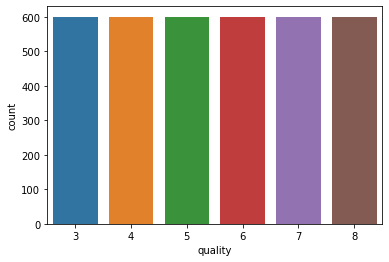

In [14]:
sns.countplot(x='quality', data=balenced_df);

In [15]:
balenced_df.shape

(3600, 12)

In [16]:
balenced_df.to_csv(f'{os.getcwd()}/winequality-red-clean.csv', index=False)

## Train/test split

In [17]:
data = df[['alcohol','sulphates','citric acid','volatile acidity', 'quality']]
X = data.drop('quality', axis=1)
y = data.quality

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (1279, 4)
x test:  (320, 4)
y train:  (1279,)
y test:  (320,)


## Ajustement des modèles

In [19]:
from sklearn.metrics import r2_score, mean_absolute_error, confusion_matrix
from sklearn.model_selection import cross_val_score
import warnings
warnings.simplefilter(action='ignore')

mae_train_scores = []
mae_test_scores = []
cv_mean = []

def wine_quality_prediction_model(model):
    """
    Arg: modèle de regression
    Calcule le score du modèle avec la métrique ... et affiche la matrice de confusion.
    """
    model.fit(X_train, y_train)
    
    # Mean Absolute Error of training set
    y_train_pred = np.round(model.predict(X_train))
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_train_scores.append(round(mae_train,2))
    
    # Mean Absolute score of test set
    y_test_pred = np.round(model.predict(X_test))
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mae_test_scores.append(round(mae_test,2))
    
    # CV score of training set
    cv_training = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    cv_mean_training = cv_training.mean()
    cv_mean.append(round(cv_mean_training,2))
       
    # Printing each score
    print("Training set RMAE:", round(mae_train, 2))
    print("Test set set RMAE:", round(mae_test, 2))
    print("Training cross validation score: ", cv_training)
    print("Training cross validation mean score: ",round(cv_mean_training,2))
    
    fig, ax = plt.subplots(1, 3, figsize = (16,4));
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_train_pred), hist = False, ax = ax[0])
    ax[0].set_xlabel('y_pred')

    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_test_pred)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    ax[2].set_title('Matrice de confusion')
    sup = max(max(y_test), max(y_test_pred))
    inf = min(min(y_test), min(y_test_pred))
    cm = pd.DataFrame(confusion_matrix(y_train,y_train_pred))
                     #index = np.arange(inf, sup+1),
                     #columns = np.arange(inf, sup+1))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt="d", ax=ax[2])
    ax[2].set_xlabel('Predicted Quality')
    ax[2].set_ylabel('True Quality')

    plt.show();

### Support Vector Regression

Training set RMAE: 0.32
Test set set RMAE: 0.44
Training cross validation score:  [-0.54888548 -0.59796765 -0.59810637 -0.53184461 -0.56547447]
Training cross validation mean score:  -0.57


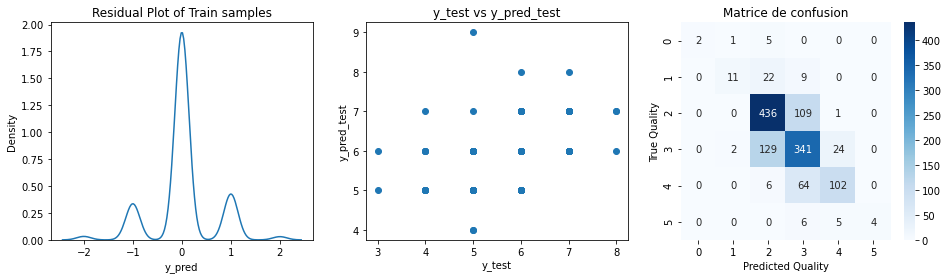

In [20]:
from sklearn.svm import SVR
svr = SVR(C=250)
wine_quality_prediction_model(svr)

### Ordinary Least Square

Training set RMAE: 0.46
Test set set RMAE: 0.39
Training cross validation score:  [-0.53346562 -0.55643582 -0.52222957 -0.5213459  -0.50800054]
Training cross validation mean score:  -0.53


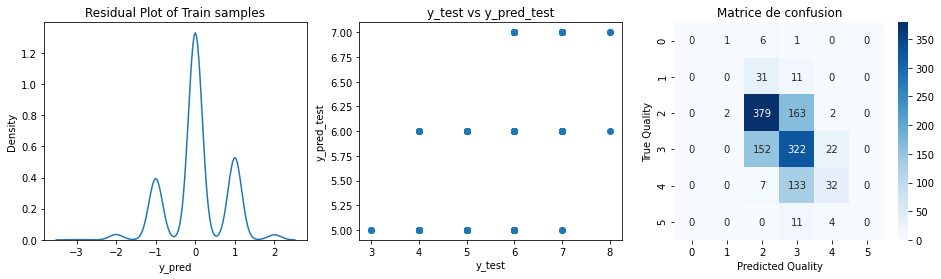

In [21]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
wine_quality_prediction_model(lm);

### Principal Components Regression (PCR)

Training set RMAE: 0.47
Test set set RMAE: 0.42
Training cross validation score:  [-0.53885257 -0.55674596 -0.52500244 -0.52150174 -0.5142057 ]
Training cross validation mean score:  -0.53


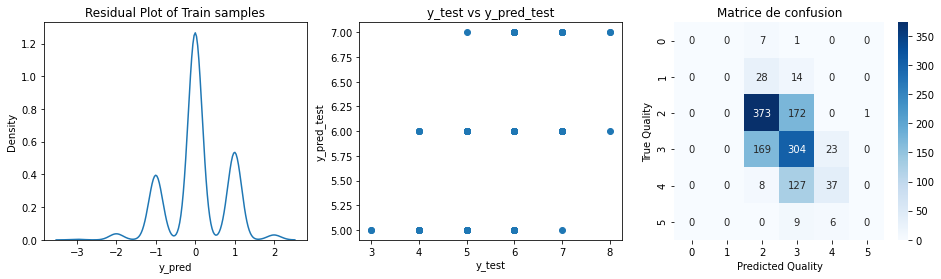

In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
pcr = make_pipeline(PCA(n_components=3), LinearRegression())
wine_quality_prediction_model(pcr)

### Partial Least Square Regression (PLSR)

Training set RMAE: 0.46
Test set set RMAE: 0.39
Training cross validation score:  [-0.53288549 -0.55643789 -0.5222112  -0.52109214 -0.50798746]
Training cross validation mean score:  -0.53


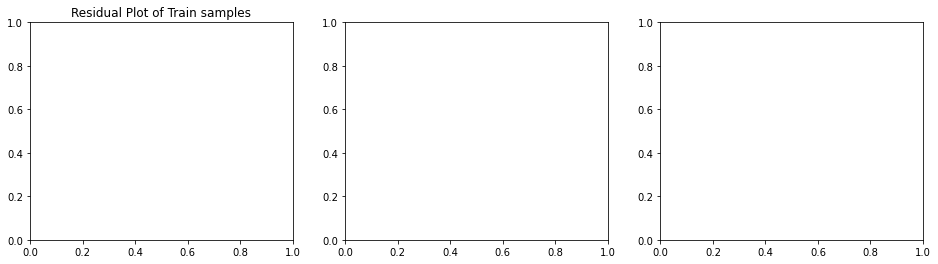

In [23]:
from sklearn.cross_decomposition import PLSRegression
pls = PLSRegression(n_components=3)
try:
    wine_quality_prediction_model(pls)
except: pass

### K-Nearest Neighbors (KNN)

Training set RMAE: 0.35
Test set set RMAE: 0.45
Training cross validation score:  [-0.5453125  -0.5890625  -0.5203125  -0.503125   -0.52313725]
Training cross validation mean score:  -0.54


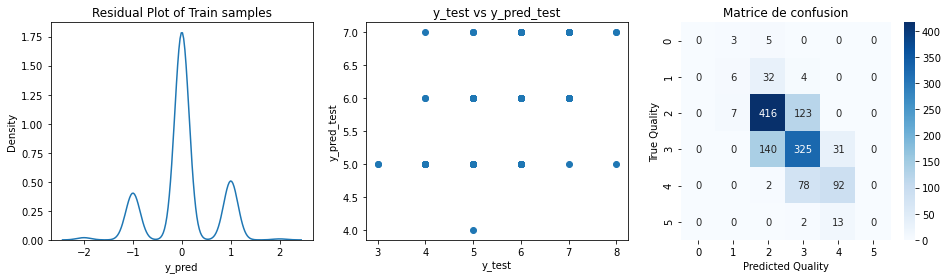

In [24]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor() #, weights='uniform')
wine_quality_prediction_model(knn)

### Random Forest Regressor (RFR)

Training set RMAE: 0.05
Test set set RMAE: 0.36
Training cross validation score:  [-0.46675781 -0.51889974 -0.47740039 -0.46640625 -0.44478431]
Training cross validation mean score:  -0.47


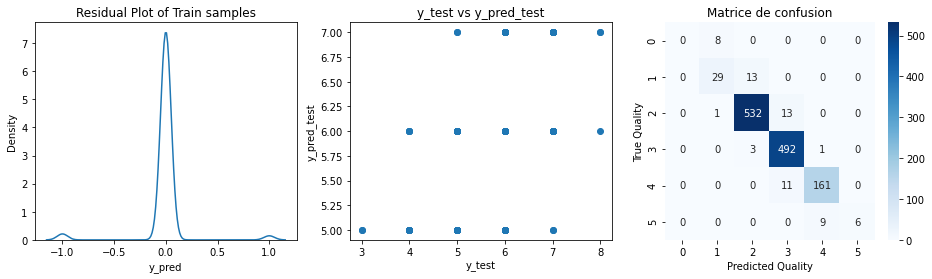

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()
wine_quality_prediction_model(rf)

### Gradient Boosting Regressor

Training set RMAE: 0.34
Test set set RMAE: 0.39
Training cross validation score:  [-0.50665624 -0.5362266  -0.51325113 -0.51431959 -0.47141405]
Training cross validation mean score:  -0.51


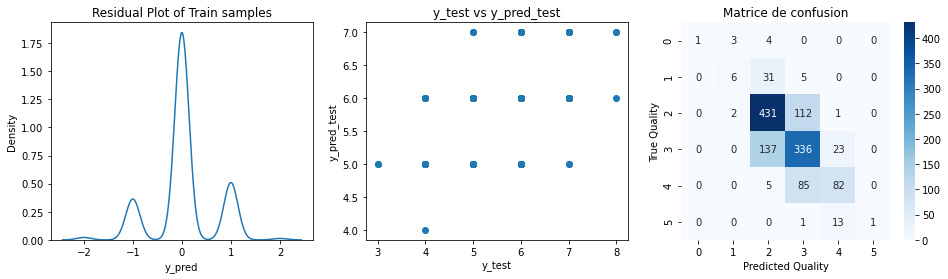

In [26]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
wine_quality_prediction_model(gb)

### eXtrem Gradient Boosting Regressor

Training set RMAE: 0.01
Test set set RMAE: 0.43
Training cross validation score:  [-0.50317404 -0.50599252 -0.4868291  -0.47742301 -0.44908228]
Training cross validation mean score:  -0.48


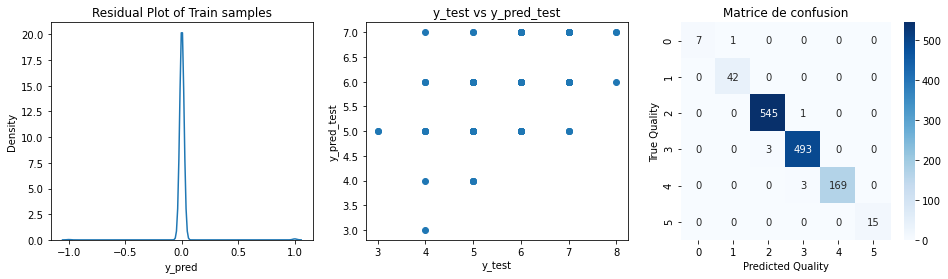

In [27]:
from xgboost import XGBRegressor
xg = XGBRegressor(verbosity= 0)
wine_quality_prediction_model(xg)

### Bilan

In [28]:
algo = ["SVR", "OLS", "PCR", "PLS", "KNN", "RF","GB", "XGB"]

model_eval = pd.DataFrame({'MAE (Train)': mae_train_scores, 'MAE (Test)': mae_test_scores,
                           'CV score mean (Train)': cv_mean})
model_eval.index=algo

display(model_eval)

,MAE (Train),MAE (Test),CV score mean (Train)
SVR,0.32,0.44,-0.57
OLS,0.46,0.39,-0.53
PCR,0.47,0.42,-0.53
PLS,0.46,0.39,-0.53
KNN,0.35,0.45,-0.54
RF,0.05,0.36,-0.47
GB,0.34,0.39,-0.51
XGB,0.01,0.43,-0.48


Le modèle ayant obtenu les meilleurs résultat est ... avec les paramètres :
- par1
- par2
- etc

# Classification

In [3]:
data = df.copy()
data['quality'] = df.quality > 6.5
data[data.quality == 1].shape

(217, 12)

## Train/test split

In [4]:
X = data.drop('quality', axis=1)
y = data.quality

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (1279, 11)
x test:  (320, 11)
y train:  (1279,)
y test:  (320,)


In [6]:
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix, roc_auc_score, f1_score
#classification_report
from sklearn.model_selection import cross_val_score
import warnings
warnings.simplefilter(action='ignore')

auc_train_scores = []
auc_test_scores = []
f1_train_scores = []
f1_test_scores = []

def wine_quality_prediction_model(model):
    """
    Arg: modèle de regression
    Calcule le score du modèle avec la métrique ... et affiche la matrice de confusion.
    """
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    auc_train = roc_auc_score(y_train, y_train_pred)
    auc_train_scores.append(round(auc_train,2))
    f1_train = f1_score(y_train, y_train_pred, average='macro')
    f1_train_scores.append(round(f1_train,2))
    
    y_test_pred = model.predict(X_test)
    auc_test = roc_auc_score(y_test, y_test_pred)
    auc_test_scores.append(round(auc_test,2))
    f1_test = f1_score(y_test, y_test_pred, average='macro')
    f1_test_scores.append(round(f1_test,2))
    
    #print(classification_report(y_test, y_test_pred))
    
    fig, ax = plt.subplots(1, 2, figsize = (10,4));
    ax[0].set_title('Matrice de confusion')
    plot_confusion_matrix(model, X_test, y_test, cmap='Blues', ax=ax[0])
    ax[1].set_title('Courbe ROC')
    plot_roc_curve(model, X_test, y_test, ax=ax[1])

    plt.show();

In [7]:
from sklearn.model_selection import GridSearchCV

### SVM

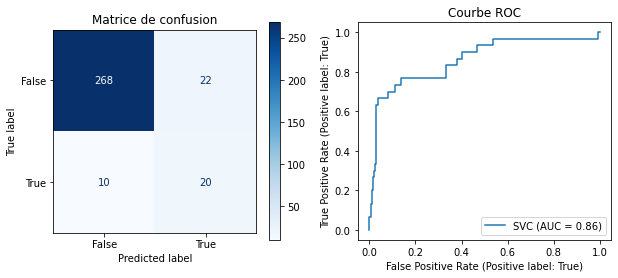

In [13]:
from sklearn.svm import SVC
svc = SVC(250)
wine_quality_prediction_model(svc)

### KNN

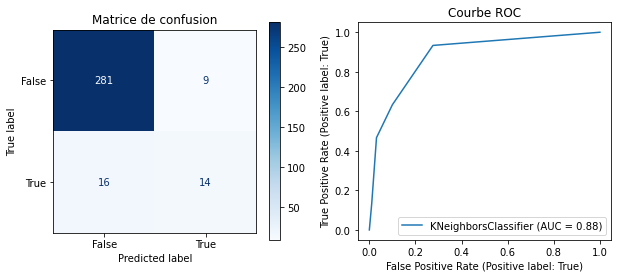

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)
wine_quality_prediction_model(knn)

### Decision Tree Classifier

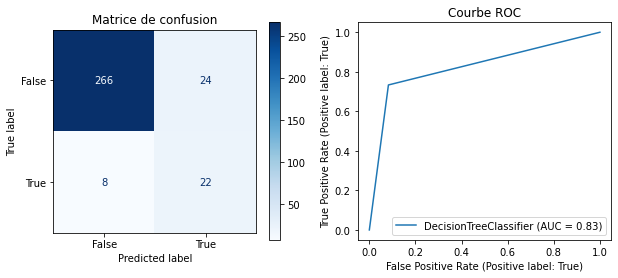

In [11]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
wine_quality_prediction_model(dt)

### Random Forest

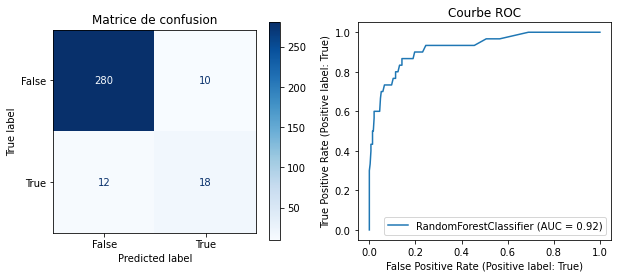

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
wine_quality_prediction_model(rf)

### Gradient Boosting Classifier

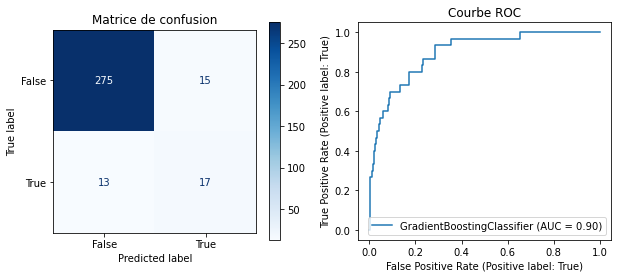

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
wine_quality_prediction_model(gb)

### eXtrem Gradient Boosting Classifier

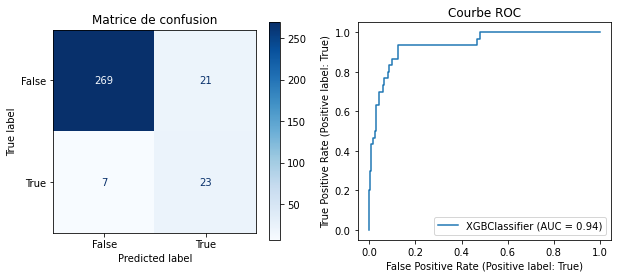

In [9]:
from xgboost import XGBClassifier
xgb = XGBClassifier(verbosity= 0)
wine_quality_prediction_model(xgb)

### Ada Boost

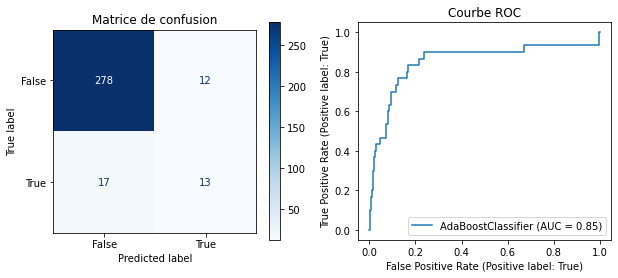

In [60]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier()
wine_quality_prediction_model(ab)

### LDA

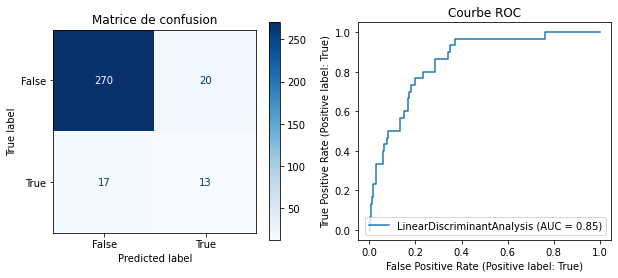

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
wine_quality_prediction_model(lda)

### QDA

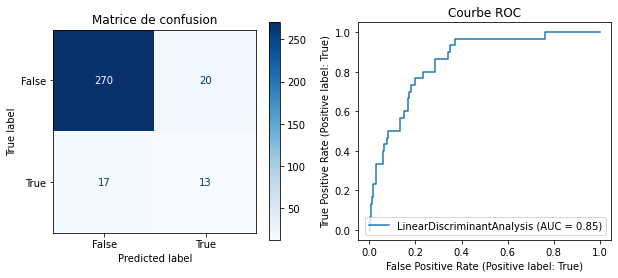

In [62]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = LinearDiscriminantAnalysis()
wine_quality_prediction_model(qda)

## Bilan : Classification

In [63]:
algo = ["svm", "knn", "dt", "rf", "gb", "xgb", "ab", "lda","qda"]
model_eval = pd.DataFrame({'AUC (Train)': auc_train_scores, 'AUC (Test)': auc_test_scores,
                          'F1 (Train)': f1_train_scores, 'F1 (Test)': f1_test_scores})
model_eval.index = algo
display(model_eval)

,AUC (Train),AUC (Test),F1 (Train),F1 (Test)
svm,0.99,0.80,0.99,0.75
knn,0.73,0.72,0.77,0.74
dt,1.00,0.82,1.00,0.74
rf,1.00,0.82,1.00,0.83
gb,0.89,0.76,0.92,0.75
xgb,1.00,0.85,1.00,0.79
ab,0.75,0.70,0.78,0.71
lda,0.70,0.68,0.72,0.67
qda,0.70,0.68,0.72,0.67


Le modèle ... les les hyperparamètre ... donne les meilleurs résultats.

# Détection d'outlier

### Ajustement

In [44]:
bons_vins = df.quality > 6.5
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
outlier = lof.fit_predict(df) == -1
display(df[outlier & bons_vins])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
442,15.6,0.685,0.76,3.7,0.100,6.0,43.0,1.00320,2.95,0.68,11.2,7
444,5.3,0.570,0.01,1.7,0.054,5.0,27.0,0.99340,3.57,0.84,12.5,7
538,12.9,0.350,0.49,5.8,0.066,5.0,35.0,1.00140,3.20,0.66,12.0,7
1043,9.5,0.390,0.41,8.9,0.069,18.0,39.0,0.99859,3.29,0.81,10.9,7
1079,7.9,0.300,0.68,8.3,0.050,37.5,278.0,0.99316,3.01,0.51,12.3,7
1081,7.9,0.300,0.68,8.3,0.050,37.5,289.0,0.99316,3.01,0.51,12.3,7


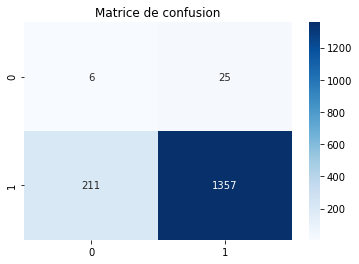

In [45]:
mat_confusion = np.array([
    [df[bons_vins & outlier].shape[0], df[~bons_vins & outlier].shape[0]],
    [df[bons_vins & ~outlier].shape[0], df[~bons_vins & ~outlier].shape[0]]
])

sns.heatmap(mat_confusion, annot=True, cmap='Blues', fmt="d")
plt.title('Matrice de confusion');

### Bilan

# Conclusion

# Annexe

## Profile Report

In [46]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df, progress_bar=False)
# # profile.to_notebook_iframe()